**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

**Concepts Tested:**

Ensemble Learning- Bagging
Ensemble Learning- Boosting
KNN Imputation of Missing Values
Working with an imbalanced dataset

**What "good" looks like:**

Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset.

Convert date-like features to their respective data type

Check for missing values and Prepare data for KNN Imputation

You may consider only numerical features for this purpose

Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)

You can start from storing unique Driver IDs in an empty dataframe and then bring all the features at same level (Groupby Driver ID)

**Feature Engineering Steps:**

Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

Statistical summary of the derived dataset

Check correlation among independent variables and how they interact with each other

One hot encoding of the categorical variable

Class Imbalance Treatment

Standardization of training data

Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning

**Results Evaluation:**

Classification Report

ROC AUC curve

Provide actionable Insights & Recommendations


**Evaluation Criteria (100 Points):**

Define Problem Statement and perform Exploratory Data Analysis (10 points)
Definition of problem (as per given problem statement with additional views)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
Bivariate Analysis (Relationships between important variables)
Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Data Preprocessing (50 Points)
KNN Imputation
Feature Engineering
Class Imbalance treatment
Standardization
Encoding
Model building (20 Points)
1 Ensemble - Bagging Algorithm
1 Ensemble - Boosting Algorithm
Results Evaluation (10 Points)
ROC AUC Curve & comments
Classification Report (Confusion Matrix etc)
Actionable Insights & Recommendations (10 Points)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/ola_driver_scaler.csv')

In [ ]:
df.shape

(19104, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.head(30)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
for col in df.columns:
  print(f"{col} - {df[col].nunique()}")

Unnamed: 0 - 19104
MMM-YY - 24
Driver_ID - 2381
Age - 36
Gender - 2
City - 29
Education_Level - 3
Income - 2383
Dateofjoining - 869
LastWorkingDate - 493
Joining Designation - 5
Grade - 5
Total Business Value - 10181
Quarterly Rating - 4


In [ ]:
# Convert columns - MMM-YY, Dateofjoining, LastWorkingDate - into datetime format
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

<ipython-input-6-e571acf03b23>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
<ipython-input-6-e571acf03b23>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
<ipython-input-6-e571acf03b23>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [ ]:
# Convert columns - gender, city, education_level, joining designation - into category datatype
df['Gender'] = df['Gender'].astype('category')
df['City'] = df['City'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Joining Designation'] = df['Joining Designation'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  category      
 5   City                  19104 non-null  category      
 6   Education_Level       19104 non-null  category      
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  category      
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [ ]:
df['Age'].value_counts()

,count
Age,
36.0,1283
33.0,1250
34.0,1234
30.0,1146
32.0,1143
35.0,1138
31.0,1076
29.0,1013
37.0,862


In [ ]:
# Missing values
df.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


In [ ]:
# Find % of missing values
df.isna().sum()/df.shape[0]*100

,0
Unnamed: 0,0.000000
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039


In [ ]:
# Create copy of dataframe before groupby
df_copy = df.copy()

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [ ]:
# Identify changes in column values across mulitple rows for each driver

# 1. Sort and Group the Data
# 2. Detect Changes Over Time

# 1. Sort & group the data
df_copy = df_copy.sort_values(by=['Driver_ID', 'MMM-YY'])

In [ ]:
df_copy.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
5,5,2019-12-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
6,6,2020-01-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
7,7,2020-02-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
8,8,2020-03-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,350000,1
9,9,2020-04-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1


In [ ]:
# 2. Detect changes over time
df_changes = df_copy.groupby('Driver_ID').apply(lambda x: x.iloc[-1] != x.iloc[0])

changing_columns = df_changes.any()
changing_columns_list = changing_columns[changing_columns == True].index.tolist()
changing_columns_list

<ipython-input-17-66b2a76cca50>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_changes = df_copy.groupby('Driver_ID').apply(lambda x: x.iloc[-1] != x.iloc[0])


['Unnamed: 0',
 'MMM-YY',
 'Age',
 'Gender',
 'Income',
 'LastWorkingDate',
 'Grade',
 'Total Business Value',
 'Quarterly Rating']

In [ ]:
# Identify drivers with change in 'Age' value over multiple rows
drivers_with_age_issue = df_changes[df_changes['Age'] == True].index.tolist()
print(f"No.of drivers with 'age' value changes: {len(drivers_with_age_issue)}")

# Inspect one of them
problem_driver_id = drivers_with_age_issue[0]
df[df['Driver_ID'] == problem_driver_id].sort_values('MMM-YY')

No.of drivers with 'age' value changes: 1096


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
28,28,2019-01-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,250000,1
29,29,2019-02-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,1719680,1
30,30,2019-03-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,545240,1
31,31,2019-04-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,250000,2
32,32,2019-05-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,895510,2
33,33,2019-06-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,0,2
34,34,2019-07-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,350650,2
35,35,2019-08-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,708360,2
36,36,2019-09-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,1190290,2
37,37,2019-10-01,13,29.0,0.0,C19,2,119227,2015-05-28,NaT,1,4,0,1


**1096 drivers with changing age** - happening when the month of birth is repeating across years. When aggregating at driver level, we can take the latest value across the rows.

In [ ]:
# Identify drivers with change in 'Gender' value over multiple rows
drivers_with_gender_issue = df_changes[df_changes['Gender'] == True].index.tolist()
print(f"No.of drivers with 'gender' value changes: {len(drivers_with_gender_issue)}")

# Inspect one of them
problem_driver_id = drivers_with_gender_issue[1]
df[df['Driver_ID'] == problem_driver_id].sort_values('MMM-YY')

No.of drivers with 'gender' value changes: 16


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
859,859,2019-11-01,119,31.0,NaN,C29,1,71000,2019-11-16,NaT,3,3,0,1
860,860,2019-12-01,119,32.0,1.0,C29,1,71000,2019-11-16,NaT,3,3,0,1
861,861,2020-01-01,119,32.0,1.0,C29,1,71000,2019-11-16,NaT,3,3,0,1
862,862,2020-02-01,119,32.0,1.0,C29,1,71000,2019-11-16,NaT,3,3,557720,1
863,863,2020-03-01,119,32.0,1.0,C29,1,71000,2019-11-16,2020-03-24,3,3,0,1


**16 drivers with change in 'Gender'** - seems to be because of null values in some rows. When aggregating this column, use mode (most frequent).

In [ ]:
# Identify drivers with change in 'Income' value over multiple rows
drivers_with_income_changes = df_changes[df_changes['Income'] == True].index.tolist()
print(f"No.of drivers with income value changes: {len(drivers_with_income_changes)}")

# Inspect one of them
problem_driver_id = drivers_with_income_changes[0]  # or use .head(1) for safety
df[df['Driver_ID'] == problem_driver_id].sort_values('MMM-YY')

No.of drivers with income value changes: 43


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
138,138,2019-01-01,26,41.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,243110,4
139,139,2019-02-01,26,41.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,646330,4
140,140,2019-03-01,26,41.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,17651940,4
141,141,2019-04-01,26,41.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,242510,4
142,142,2019-05-01,26,41.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,1098080,4
143,143,2019-06-01,26,41.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,1212720,4
144,144,2019-07-01,26,41.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,2695910,4
145,145,2019-08-01,26,41.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,494710,4
146,146,2019-09-01,26,42.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,986540,4
147,147,2019-10-01,26,42.0,0.0,C14,2,121529,2018-05-07,NaT,1,3,9950710,4


In [ ]:
# Inspect one of them
problem_driver_id = drivers_with_income_changes[3]  # or use .head(1) for safety
df[df['Driver_ID'] == problem_driver_id].sort_values('MMM-YY')

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
668,668,2019-08-01,98,24.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,0,3
669,669,2019-09-01,98,24.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,1374540,3
670,670,2019-10-01,98,24.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,5250000,4
671,671,2019-11-01,98,24.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,2256470,4
672,672,2019-12-01,98,24.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,1410000,4
673,673,2020-01-01,98,24.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,2999000,4
674,674,2020-02-01,98,24.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,0,4
675,675,2020-03-01,98,24.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,3888860,4
676,676,2020-04-01,98,25.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,1485010,4
677,677,2020-05-01,98,25.0,0.0,C16,0,57977,2019-08-15,NaT,2,2,1489150,4


**43 drivers with change in Income** - monthly income of these drivers changed with time. This can be an useful pointer for driver retention & churn prediction. Create a flag that marks drivers with change in income (+1 if income increases, 0 if income remained same, -1 if income decreases).

In [ ]:
# Create income_trend_flag
df_sorted = df_copy.sort_values(['Driver_ID', 'MMM-YY'])

def income_trend_flag(x):
    first_income = x['Income'].iloc[0]
    last_income = x['Income'].iloc[-1]

    if pd.isna(first_income) or pd.isna(last_income):
        return np.nan
    elif last_income > first_income:  # increase in monthly income
        return 1
    elif last_income < first_income:  # decrease in monthly income
        return -1
    else:         # no change in income
        return 0

income_flag_df = df_sorted.groupby('Driver_ID').apply(income_trend_flag).reset_index(name='Income_Trend_Flag')
df_copy = df_copy.merge(income_flag_df, on='Driver_ID', how='left')



<ipython-input-22-c3a11cfbb50f>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  income_flag_df = df_sorted.groupby('Driver_ID').apply(income_trend_flag).reset_index(name='Income_Trend_Flag')


In [ ]:
df_copy.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Income_Trend_Flag
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0


In [ ]:
# Similarly create 'grade_trend_flag', rank_trend_flag also
df_copy = df_copy.sort_values(['Driver_ID','MMM-YY'])

def grade_trend_flag(x):
    first_grade = x['Grade'].iloc[0]
    last_grade = x['Grade'].iloc[-1]

    if pd.isna(first_grade) or pd.isna(last_grade):
        return np.nan
    elif last_grade > first_grade:  # increase in grade
        return 1
    elif last_grade < first_grade:  # decrease in grade
        return -1
    else:         # no change in grade
        return 0

grade_flag_df = df_sorted.groupby('Driver_ID').apply(grade_trend_flag).reset_index(name='Grade_Trend_Flag')
df_copy = df_copy.merge(grade_flag_df, on='Driver_ID', how='left')

<ipython-input-24-b8ea491c8a14>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grade_flag_df = df_sorted.groupby('Driver_ID').apply(grade_trend_flag).reset_index(name='Grade_Trend_Flag')


In [ ]:
df_copy.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Income_Trend_Flag,Grade_Trend_Flag
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,0
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0


In [ ]:
# Similarly create 'rank_trend_flag'
df_copy = df_copy.sort_values(['Driver_ID','MMM-YY'])

def rating_trend_flag(x):
    first_rating = x['Quarterly Rating'].iloc[0]
    last_rating = x['Quarterly Rating'].iloc[-1]

    if pd.isna(first_rating) or pd.isna(last_rating):
        return np.nan
    elif last_rating > first_rating:  # increase in rating
        return 1
    elif last_rating < first_rating:  # decrease in rating
        return -1
    else:         # no change in rating
        return 0

rating_flag_df = df_sorted.groupby('Driver_ID').apply(rating_trend_flag).reset_index(name='Rating_Trend_Flag')
df_copy = df_copy.merge(rating_flag_df, on='Driver_ID', how='left')

<ipython-input-26-c8bda7506482>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rating_flag_df = df_sorted.groupby('Driver_ID').apply(rating_trend_flag).reset_index(name='Rating_Trend_Flag')


In [ ]:
df_copy.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Income_Trend_Flag,Grade_Trend_Flag,Rating_Trend_Flag
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0,0
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0,0
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,0,0
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0


In [ ]:
# Create new flag (target variable) - 1 if driver has lastworking date (left Ola), 0 otherwise
df_copy = df_copy.sort_values(['Driver_ID', 'MMM-YY'])

def driver_churn_flag(group):
    last_date = group['LastWorkingDate'].iloc[-1]

    if pd.isnull(last_date):
        return 0
    elif isinstance(last_date, pd.Timestamp):
        return 1
    else:
        return 0

churn_flag_df = df_copy.groupby('Driver_ID').apply(driver_churn_flag).reset_index(name='Driver_Churn_Flag')
df_copy = df_copy.merge(churn_flag_df, on='Driver_ID', how='left')


<ipython-input-28-38aaa7a2b055>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_flag_df = df_copy.groupby('Driver_ID').apply(driver_churn_flag).reset_index(name='Driver_Churn_Flag')


In [ ]:
df_copy.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Income_Trend_Flag,Grade_Trend_Flag,Rating_Trend_Flag,Driver_Churn_Flag
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0,0,1
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0,0,1
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,0,0,1
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,0
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  category      
 5   City                  19104 non-null  category      
 6   Education_Level       19104 non-null  category      
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  category      
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [ ]:
df_copy.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


In [ ]:
# KNN imputation of missing values in - Age, Gender
from sklearn.impute import KNNImputer

cols_to_impute = ['Age', 'Gender']
sub_set = df_copy[cols_to_impute]

imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(sub_set)
df_copy[cols_to_impute] = imputed_array

In [ ]:
df_copy.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


In [ ]:
df_copy.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Income_Trend_Flag,Grade_Trend_Flag,Rating_Trend_Flag,Driver_Churn_Flag
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0,0,1
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0,0,1
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,0,0,1
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,0
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0,0


In [ ]:
# Group by 'Driver_ID' & aggregate the columns
df_drivers = df_copy.groupby('Driver_ID').agg({'MMM-YY':'count',
                                               'Age':'last',
                                               'Gender': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
                                               'City': 'last',
                                               'Education_Level': 'last',
                                               'Income': 'last',
                                               'Joining Designation': 'last',
                                               'Grade': 'last',
                                               'Quarterly Rating': 'last',
                                               'Total Business Value': 'sum',
                                               'Income_Trend_Flag': 'last',
                                               'Grade_Trend_Flag': 'last',
                                               'Rating_Trend_Flag': 'last',
                                               'Driver_Churn_Flag': 'last'
                                               })

In [ ]:
df_drivers.head()

,MMM-YY,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Quarterly Rating,Total Business Value,Income_Trend_Flag,Grade_Trend_Flag,Rating_Trend_Flag,Driver_Churn_Flag
Driver_ID,,,,,,,,,,,,,,
1,3,28.0,0.0,C23,2,57387,1,1,2,1715580,0,0,0,1
2,2,31.0,0.0,C7,2,67016,2,2,1,0,0,0,0,0
4,5,43.0,0.0,C13,2,65603,2,2,1,350000,0,0,0,1
5,3,29.0,0.0,C9,0,46368,1,1,1,120360,0,0,0,1
6,5,31.0,1.0,C11,1,78728,3,3,2,1265000,0,0,1,0


In [ ]:
df_drivers.describe()

,MMM-YY,Age,Gender,Income,Grade,Quarterly Rating,Total Business Value,Income_Trend_Flag,Grade_Trend_Flag,Rating_Trend_Flag,Driver_Churn_Flag
count,2381.00000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,8.02352,33.669467,0.409828,59334.157077,2.096598,1.427971,4.586742e+06,0.018060,0.018060,-0.041999,0.678706
std,6.78359,5.974396,0.491734,28383.666384,0.941522,0.809839,9.127115e+06,0.133195,0.133195,0.584031,0.467071
min,1.00000,21.000000,0.000000,10747.000000,1.000000,1.000000,-1.385530e+06,0.000000,0.000000,-1.000000,0.000000
25%,3.00000,29.000000,0.000000,39104.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,5.00000,33.000000,0.000000,55315.000000,2.000000,1.000000,8.176800e+05,0.000000,0.000000,0.000000,1.000000
75%,10.00000,37.000000,1.000000,75986.000000,3.000000,2.000000,4.173650e+06,0.000000,0.000000,0.000000,1.000000
max,24.00000,58.000000,1.000000,188418.000000,5.000000,4.000000,9.533106e+07,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_drivers.shape

(2381, 14)

In [ ]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MMM-YY                2381 non-null   int64   
 1   Age                   2381 non-null   float64 
 2   Gender                2381 non-null   float64 
 3   City                  2381 non-null   category
 4   Education_Level       2381 non-null   category
 5   Income                2381 non-null   int64   
 6   Joining Designation   2381 non-null   category
 7   Grade                 2381 non-null   int64   
 8   Quarterly Rating      2381 non-null   int64   
 9   Total Business Value  2381 non-null   int64   
 10  Income_Trend_Flag     2381 non-null   int64   
 11  Grade_Trend_Flag      2381 non-null   int64   
 12  Rating_Trend_Flag     2381 non-null   int64   
 13  Driver_Churn_Flag     2381 non-null   int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 231.8 KB


In [ ]:
df_drivers = df_drivers.rename(columns={'MMM-YY': 'Total_Months'})

In [ ]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Total_Months          2381 non-null   int64   
 1   Age                   2381 non-null   float64 
 2   Gender                2381 non-null   float64 
 3   City                  2381 non-null   category
 4   Education_Level       2381 non-null   category
 5   Income                2381 non-null   int64   
 6   Joining Designation   2381 non-null   category
 7   Grade                 2381 non-null   int64   
 8   Quarterly Rating      2381 non-null   int64   
 9   Total Business Value  2381 non-null   int64   
 10  Income_Trend_Flag     2381 non-null   int64   
 11  Grade_Trend_Flag      2381 non-null   int64   
 12  Rating_Trend_Flag     2381 non-null   int64   
 13  Driver_Churn_Flag     2381 non-null   int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 231.8 KB


In [ ]:
num_cols = []
cat_cols = []

for col in df_drivers.columns:
  if df_drivers[col].dtype == 'category':
    cat_cols.append(col)
  else:
    num_cols.append(col)

print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['Total_Months', 'Age', 'Gender', 'Income', 'Grade', 'Quarterly Rating', 'Total Business Value', 'Income_Trend_Flag', 'Grade_Trend_Flag', 'Rating_Trend_Flag', 'Driver_Churn_Flag']
Categorical columns: ['City', 'Education_Level', 'Joining Designation']


In [ ]:
# Check correlation among independent variables and how they interact with each other
corr_matrix = df_drivers[num_cols].corr()
corr_matrix

,Total_Months,Age,Gender,Income,Grade,Quarterly Rating,Total Business Value,Income_Trend_Flag,Grade_Trend_Flag,Rating_Trend_Flag,Driver_Churn_Flag
Total_Months,1.000000,0.302012,0.021319,0.275418,0.249104,0.545020,0.791473,0.293425,0.293425,-0.026476,-0.345718
Age,0.302012,1.000000,0.032342,0.210592,0.252057,0.150429,0.262759,0.109938,0.109938,-0.054676,-0.078638
Gender,0.021319,0.032342,1.000000,0.008172,-0.002596,0.024674,0.018053,0.021666,0.021666,0.033625,0.008997
Income,0.275418,0.210592,0.008172,1.000000,0.741453,0.163429,0.379468,0.090536,0.090536,0.018832,-0.201935
Grade,0.249104,0.252057,-0.002596,0.741453,1.000000,0.120442,0.382062,0.146905,0.146905,0.073859,-0.225585
Quarterly Rating,0.545020,0.150429,0.024674,0.163429,0.120442,1.000000,0.544176,0.251623,0.251623,0.504407,-0.510532
Total Business Value,0.791473,0.262759,0.018053,0.379468,0.382062,0.544176,1.000000,0.424532,0.424532,-0.041431,-0.379552
Income_Trend_Flag,0.293425,0.109938,0.021666,0.090536,0.146905,0.251623,0.424532,1.000000,1.000000,-0.006449,-0.176845
Grade_Trend_Flag,0.293425,0.109938,0.021666,0.090536,0.146905,0.251623,0.424532,1.000000,1.000000,-0.006449,-0.176845
Rating_Trend_Flag,-0.026476,-0.054676,0.033625,0.018832,0.073859,0.504407,-0.041431,-0.006449,-0.006449,1.000000,-0.340604


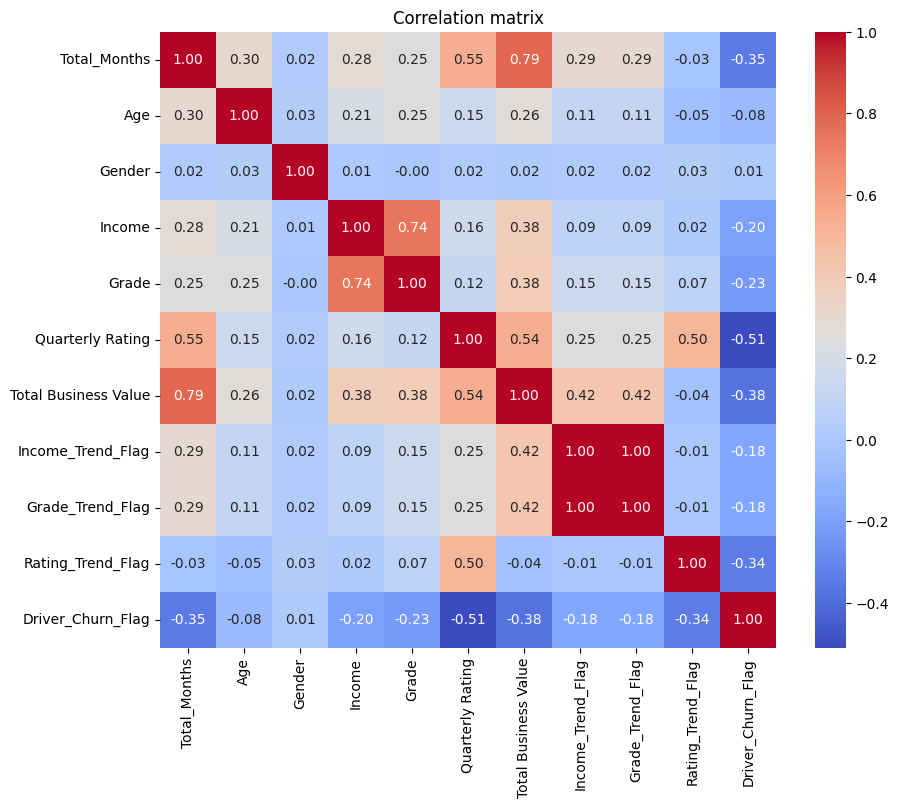

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation matrix')
plt.show()

In [ ]:
# Encoding of categorical variables
for col in cat_cols:
  print(f"{col} - {df_drivers[col].nunique()}")

City - 29
Education_Level - 3
Joining Designation - 5


In [ ]:
# Categorical features - select appropriate encoding

# one-hot encoding (low cardinality): Gender, Education_Level, Joining Designation
# ordinal encoding (inherent hierarchy in classes):
# frequency encoding (high cardinality) : City
# label encoding (target variable)

# One hot encoding of - Gender, Education_Level, Joining Designation
df_drivers = pd.get_dummies(df_drivers, columns=['Gender', 'Education_Level', 'Joining Designation'])

In [ ]:
df_drivers.head()

,Total_Months,Age,City,Income,Grade,Quarterly Rating,Total Business Value,Income_Trend_Flag,Grade_Trend_Flag,Rating_Trend_Flag,...,Gender_0.6,Gender_1.0,Education_Level_0,Education_Level_1,Education_Level_2,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5
Driver_ID,,,,,,,,,,,,,,,,,,,,,
1,3,28.0,C23,57387,1,2,1715580,0,0,0,...,False,False,False,False,True,True,False,False,False,False
2,2,31.0,C7,67016,2,1,0,0,0,0,...,False,False,False,False,True,False,True,False,False,False
4,5,43.0,C13,65603,2,1,350000,0,0,0,...,False,False,False,False,True,False,True,False,False,False
5,3,29.0,C9,46368,1,1,120360,0,0,0,...,False,False,True,False,False,True,False,False,False,False
6,5,31.0,C11,78728,3,2,1265000,0,0,1,...,False,True,False,True,False,False,False,True,False,False


In [ ]:
# Frequency encoding - City
city_freq = df_drivers['City'].value_counts(normalize=True)
df_drivers['City'] = df_drivers['City'].map(city_freq)

In [ ]:
df_drivers.head(10)

,Total_Months,Age,City,Income,Grade,Quarterly Rating,Total Business Value,Income_Trend_Flag,Grade_Trend_Flag,Rating_Trend_Flag,...,Gender_0.6,Gender_1.0,Education_Level_0,Education_Level_1,Education_Level_2,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5
Driver_ID,,,,,,,,,,,,,,,,,,,,,
1,3,28.0,0.031079,57387,1,2,1715580,0,0,0,...,False,False,False,False,True,True,False,False,False,False
2,2,31.0,0.031919,67016,2,1,0,0,0,0,...,False,False,False,False,True,False,True,False,False,False
4,5,43.0,0.029819,65603,2,1,350000,0,0,0,...,False,False,False,False,True,False,True,False,False,False
5,3,29.0,0.031499,46368,1,1,120360,0,0,0,...,False,False,True,False,False,True,False,False,False,False
6,5,31.0,0.026879,78728,3,2,1265000,0,0,1,...,False,True,False,True,False,False,False,True,False,False
8,3,34.0,0.030239,70656,3,1,0,0,0,0,...,False,False,True,False,False,False,False,True,False,False
11,1,28.0,0.030239,42172,1,1,0,0,0,0,...,False,True,False,False,True,True,False,False,False,False
12,6,35.0,0.031079,28116,1,1,2607180,0,0,-1,...,False,False,False,False,True,True,False,False,False,False
13,23,31.0,0.030239,119227,4,1,10213040,0,0,0,...,False,False,False,False,True,True,False,False,False,False


In [ ]:
df_drivers = df_drivers.rename(columns={'City': 'City_Freq'})
df_drivers = df_drivers.rename(columns={'Total_Months': 'Total_Months_Reported'})

In [ ]:
df_drivers.head()

,Total_Months_Reported,Age,City_Freq,Income,Grade,Quarterly Rating,Total Business Value,Income_Trend_Flag,Grade_Trend_Flag,Rating_Trend_Flag,...,Gender_0.6,Gender_1.0,Education_Level_0,Education_Level_1,Education_Level_2,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5
Driver_ID,,,,,,,,,,,,,,,,,,,,,
1,3,28.0,0.031079,57387,1,2,1715580,0,0,0,...,False,False,False,False,True,True,False,False,False,False
2,2,31.0,0.031919,67016,2,1,0,0,0,0,...,False,False,False,False,True,False,True,False,False,False
4,5,43.0,0.029819,65603,2,1,350000,0,0,0,...,False,False,False,False,True,False,True,False,False,False
5,3,29.0,0.031499,46368,1,1,120360,0,0,0,...,False,False,True,False,False,True,False,False,False,False
6,5,31.0,0.026879,78728,3,2,1265000,0,0,1,...,False,True,False,True,False,False,False,True,False,False


In [ ]:
# Check for class imbalance in target variable
df_drivers['Driver_Churn_Flag'].value_counts()

,count
Driver_Churn_Flag,
1,1616
0,765


In [ ]:
df_drivers['Driver_Churn_Flag'].value_counts(normalize=True)

,proportion
Driver_Churn_Flag,
1,0.678706
0,0.321294


In [ ]:
# Dataset has info with 68% drivers who left Ola & 32% drivers who retained with Ola
# So only a minor class imbalance (majority class < 80%,  usual threshold)

# Class imbalance treatment -
# 1 - using stratify in train-test-split (retain class distribution in train & test)
# 2 - using class_weight=balanced when training the model (assigns higher weights to minority class based on inverse freq)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_drivers.drop('Driver_Churn_Flag', axis=1)
y = df_drivers['Driver_Churn_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Build a base model - Logistic Regression & check performance
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train_sm, y_train_sm)
y_pred = lr_model.predict(X_test_scaled)
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Check model performance metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Print confusion matrix with % scores
cm = confusion_matrix(y_test, y_pred)

cm_pct_lr = cm.astype('float') / cm.sum() * 100
cm_pct_lr = cm_pct_lr.round(2)

print("Confusion Matrix (Percentage) - Logistic Regression:")
print(cm_pct_lr)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       153
           1       0.87      0.81      0.84       324

    accuracy                           0.79       477
   macro avg       0.76      0.78      0.76       477
weighted avg       0.80      0.79      0.79       477

ROC AUC Score: 0.85
Confusion Matrix:
[[114  39]
 [ 63 261]]
Confusion Matrix (Percentage) - Logistic Regression:
[[23.9   8.18]
 [13.21 54.72]]


In [ ]:
# Build a base model - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_sm, y_train_sm)
y_pred = dt_model.predict(X_test_scaled)
y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

# Check model performance metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)

cm_pct_dt = cm.astype('float') / cm.sum() * 100
cm_pct_dt = cm_pct_dt.round(2)

print("Confusion Matrix (Percentage): Decision Tree Classifier")
print(cm_pct_dt)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       153
           1       0.83      0.79      0.81       324

    accuracy                           0.75       477
   macro avg       0.72      0.73      0.72       477
weighted avg       0.76      0.75      0.75       477

ROC AUC Score: 0.73
Confusion Matrix:
[[101  52]
 [ 67 257]]
Confusion Matrix (Percentage): Decision Tree Classifier
[[21.17 10.9 ]
 [14.05 53.88]]


In [ ]:
# Build 1 Ensemble model - Bagging Algorithm - Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Step 1: Initialize the base model
base_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
#base_model = LogisticRegression(random_state=42)

# Step 2: Create bagging classifier
bagging_model = BaggingClassifier(estimator=base_model,
                                  n_estimators=70,
                                  max_samples=0.8,
                                  max_features=1.0,
                                  bootstrap=True,
                                  random_state=42,
                                  n_jobs=-1
                                  )

# Step 3: Train the bagging model
bagging_model.fit(X_train_sm, y_train_sm)

# Step 4: Make predictions
y_pred = bagging_model.predict(X_test_scaled)
y_prob = bagging_model.predict_proba(X_test_scaled)[:, 1]

# Step 5: Evaluate
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)

cm_pct_en = cm.astype('float') / cm.sum() * 100
cm_pct_en = cm_pct_en.round(2)

print("Confusion Matrix (Percentage): Ensemble Model - Decision Tree Classifier")
print(cm_pct_en)

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.88      0.88       324

    accuracy                           0.83       477
   macro avg       0.81      0.80      0.80       477
weighted avg       0.83      0.83      0.83       477

ROC AUC Score: 0.88
Confusion Matrix:
[[112  41]
 [ 40 284]]
Confusion Matrix (Percentage): Ensemble Model - Decision Tree Classifier
[[23.48  8.6 ]
 [ 8.39 59.54]]


In [ ]:
print(f"Total test dataset samples = {cm.sum()}")

Total test dataset samples = 477


In [ ]:
# Build 1 Ensemble model - Boosting Algorithm - Gradient Boosing Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Initialize Gradient Boosting model
boosting_model = GradientBoostingClassifier(n_estimators=70,
                                            learning_rate=0.1,
                                            max_depth=3,
                                            random_state=42
                                            )

# Step 2: Train the model
boosting_model.fit(X_train_sm, y_train_sm)

# Step 3: Make predictions on the test set
y_pred = boosting_model.predict(X_test_scaled)
y_prob = boosting_model.predict_proba(X_test_scaled)[:, 1]

# Step 5: Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)

cm_pct_bt = cm.astype('float') / cm.sum() * 100
cm_pct_bt = cm_pct_bt.round(2)

print("Confusion Matrix (Percentage): Ensemble Model - Gradient Boosting Classifier")
print(cm_pct_bt)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       153
           1       0.89      0.90      0.89       324

    accuracy                           0.86       477
   macro avg       0.83      0.83      0.83       477
weighted avg       0.85      0.86      0.85       477

ROC AUC Score: 0.90
Confusion Matrix:
[[117  36]
 [ 33 291]]
Confusion Matrix (Percentage): Ensemble Model - Gradient Boosting Classifier
[[24.53  7.55]
 [ 6.92 61.01]]


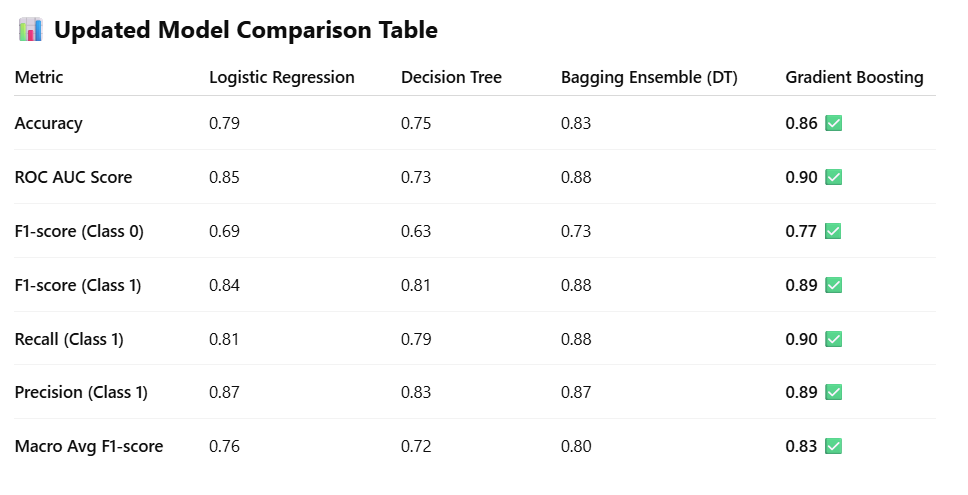

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


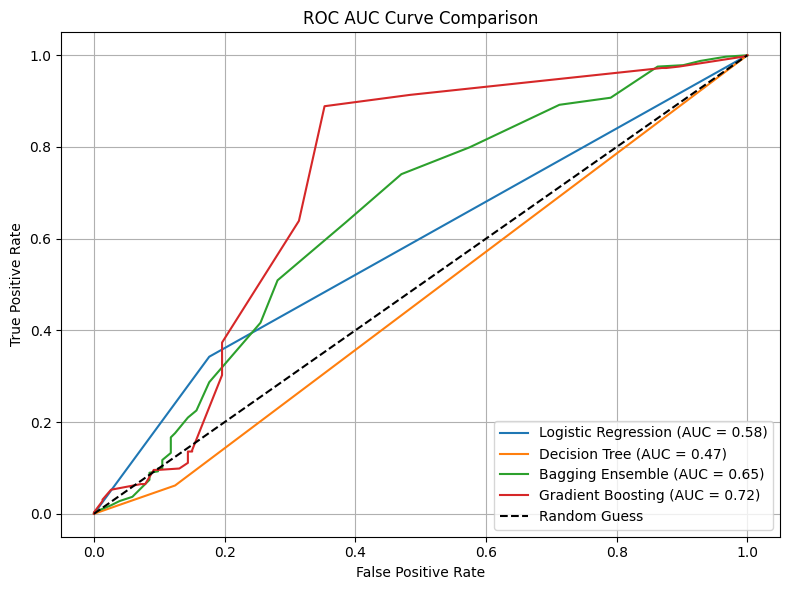

In [ ]:
# Plot & compare ROC AUC Curves
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

model_lr = LogisticRegression(random_state=42, class_weight='balanced')
model_lr.fit(X_train_sm, y_train_sm)

model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model_dt.fit(X_train_sm, y_train_sm)

base_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model_bag = BaggingClassifier(estimator=base_model,
                                  n_estimators=70,
                                  max_samples=0.8,
                                  max_features=1.0,
                                  bootstrap=True,
                                  random_state=42,
                                  n_jobs=-1)
model_bag.fit(X_train_sm, y_train_sm)

model_gbt = GradientBoostingClassifier(n_estimators=70,
                                       learning_rate=0.1,
                                       max_depth=3,
                                       random_state=42
                                       )
model_gbt.fit(X_train_sm, y_train_sm)

# Positive class = Driver left Ola
# Get predicted probabilities for the positive class (1) from each model
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
y_prob_bag = model_bag.predict_proba(X_test)[:, 1]
y_prob_gbt = model_gbt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_prob_bag)
fpr_gbt, tpr_gbt, _ = roc_curve(y_test, y_prob_gbt)

auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_bag = auc(fpr_bag, tpr_bag)
auc_gbt = auc(fpr_gbt, tpr_gbt)

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_bag, tpr_bag, label=f"Bagging Ensemble (AUC = {auc_bag:.2f})")
plt.plot(fpr_gbt, tpr_gbt, label=f"Gradient Boosting (AUC = {auc_gbt:.2f})")

# Diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

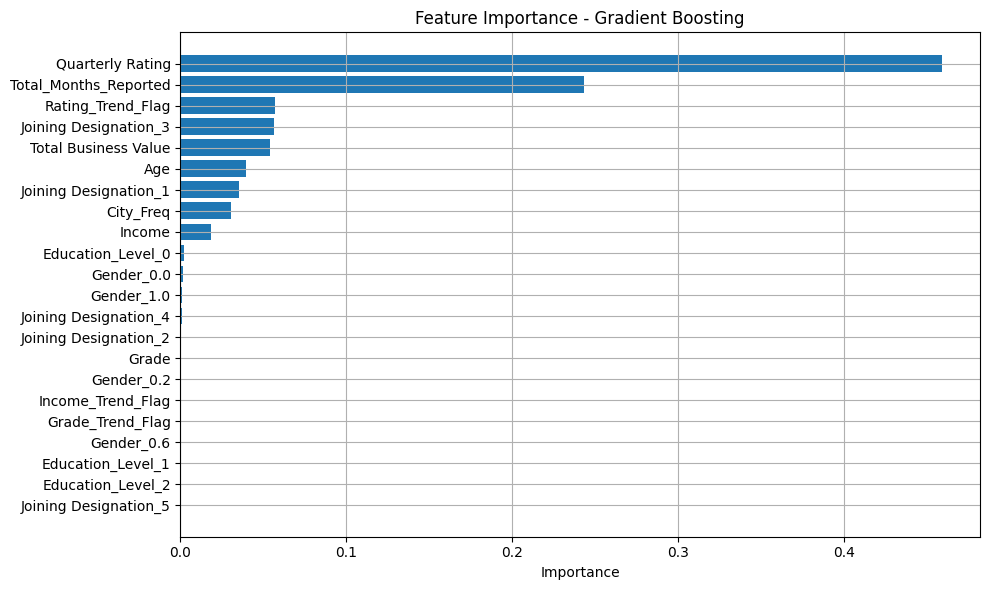

In [ ]:
# Get feature importance values
importances = model_gbt.feature_importances_

# Match them with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(True)
plt.tight_layout()
plt.show()


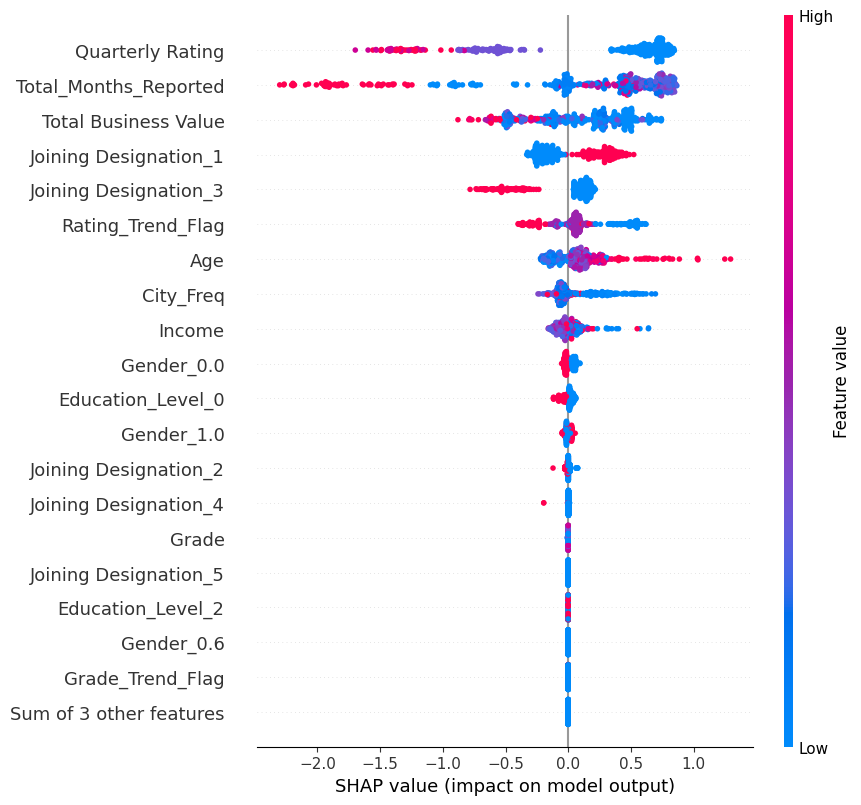

In [ ]:
# Find how much each feature positively or negatively impacts the driver churn at Ola - using SHAP
import shap

# Explainer for tree-based models
explainer = shap.Explainer(model_gbt, X_train_sm, feature_names=X_train.columns)

# Get SHAP values for the test set
shap_values = explainer(X_test_scaled)

shap.plots.beeswarm(shap_values, max_display=20)

**Actionable Insights & Recommendations**

*   Driver churn prediction -
  *   Positive class (class of interest) = driver churn (drivers who left Ola) & predicting factors that lead to churn
  *   False Negatives = driver predicted to stay but left Ola -> are more important in this problem
  *   Boosting ensemble model gave the best performance on all metrics (ex: AUC = 0.72) when compared to Bagging ensemble model (with DT as base model), single Decision Tree Classifier & single Logistic Regression model
  *   For the GBDT model, top 2 features with significant impact on model prediction are -
      *   Quarterly rating of the drivers - better the rating, less is the churn
      *   Tenure of the driver with Ola (Total months reported), - more the tenure, less the churn - followed by next 3 features -
          *  Total business value (when total business is low, churn is high - as expected)
          *  Joining designation (when low = 1, led to churn & when high=3, led to retention)
          *  Rating trend flag (when change in quarterly rating is low (decreasing), churn increases & when change is high (increasing) - churn decreases)
          *  Remaining features - Age, Gender, City, Education Level & Income - have non-zero but low impact on driver churn

**Recommendations & action items for Ola** - How can the predictions help reduce the driver churn at Ola?
*   Rating of the driver - for drivers predicted to churn (leave Ola), work with them closely to improve their customer rating - which is strong predictor of churn.
*   Total business value - work closely with drivers & the tech team to reduce expenses that bring down their business value (like cancellations / refunds, downtimes & car EMI adjustments)

Better rated drivers get picked up more often leading to more rides & so higher total business value - this can be the vicious growth cycle.

*   Joining designation - when onboarding new drivers, look for more drivers with higher joining designation (probably experienced senior drivers) - who are more likely to retain with Ola
*   Tenure - in early days of the driver, provide mentoring to drivers for first 6 months (2 quarters) to help them cross the minimum duration required to build ratings and they can start to see growth in ratings, rides & business value.
    